### 1a : Download the Vertebral Column Data Set  ###

**Name : Mohammed Junaid Iqbal Khalidi ,**
**Github username : junaid537 ,**
**USC ID : 1674712065 ,**

In [1558]:
import os
os.listdir(".")
os.getcwd()

'/Users/junaidiqbalkhalidi/Desktop/fall24-mlds/proj0'

In [1541]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score)
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import mahalanobis
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import euclidean, cityblock, chebyshev
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.io import arff
from collections import Counter
sns.set_theme(style="ticks")
data1= arff.loadarff("data/column_2C_weka.arff")

In [1545]:
headers=["pelvic_incidence","pelvic tilt","lumbar lordosis angle","sacral slope","pelvic radius","grade of spondylolisthesis","result"]
#df=pd.read_table("column_2C.dat",header=None)
df = pd.read_csv("data/column_2C.dat", header=None, sep=r'\s+')
df.shape
df.columns=headers
df['result'] = df['result'].map({'NO': 0, 'AB': 1})
df

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### 1b. Pre-Processing and Exploratory data analysis: ###


### 1b(i) Scatter plots of independent variables in dataset ###

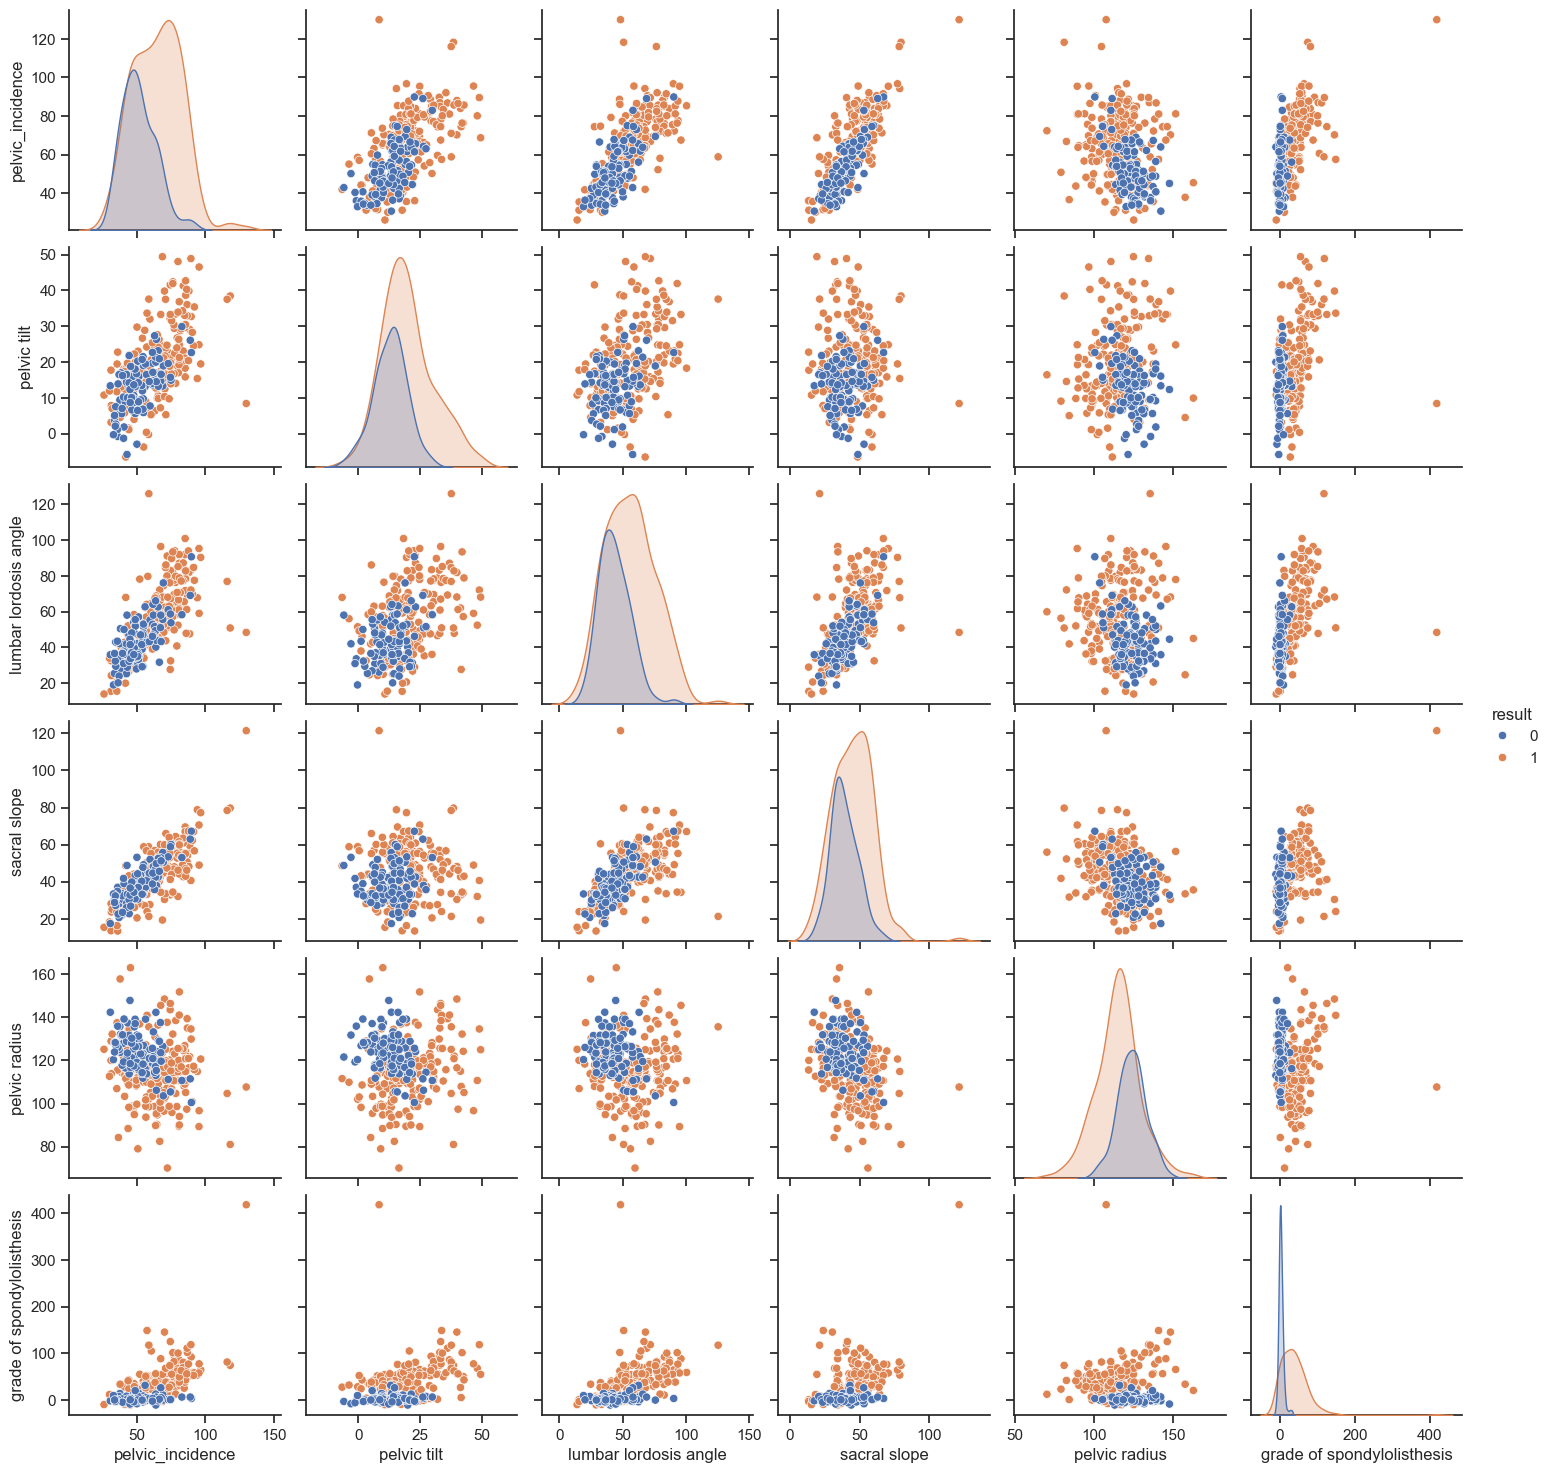

In [1464]:
sns.pairplot(df,hue="result")

     pelvic_incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic radius  grade of spondylolisthesis  result  
0            98.67                       -

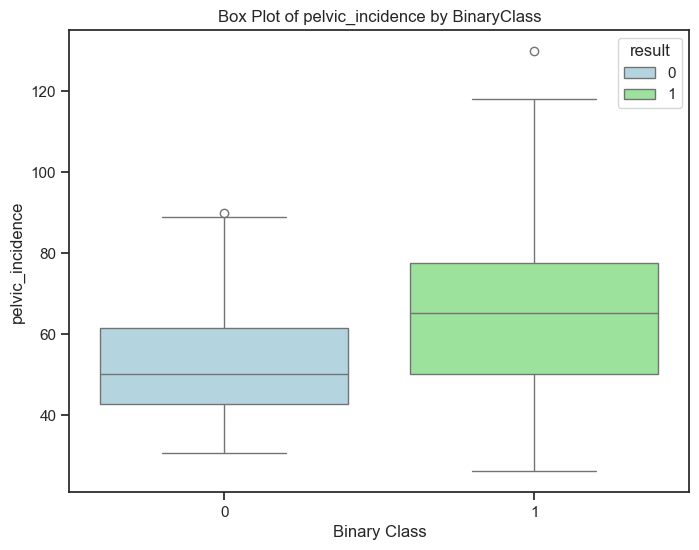

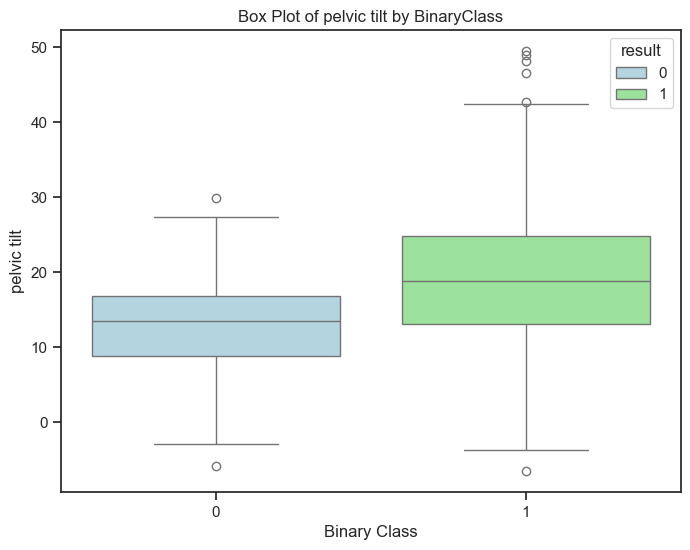

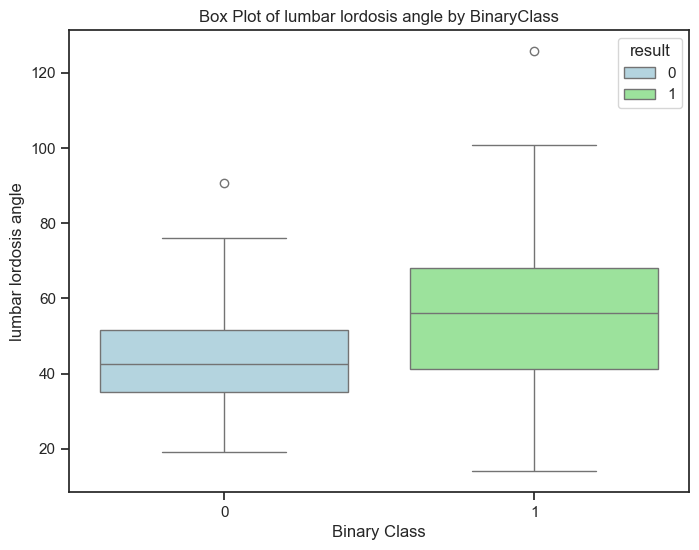

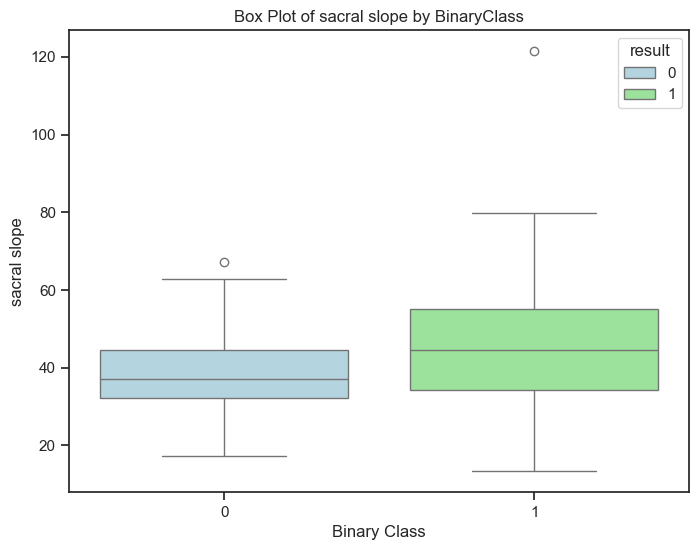

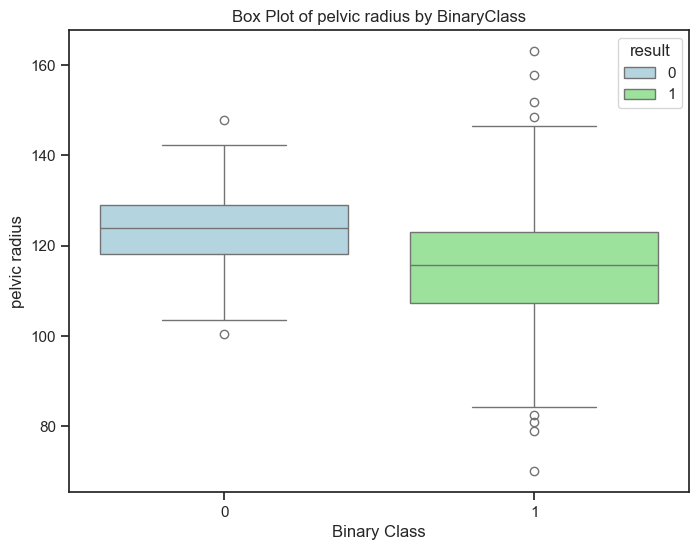

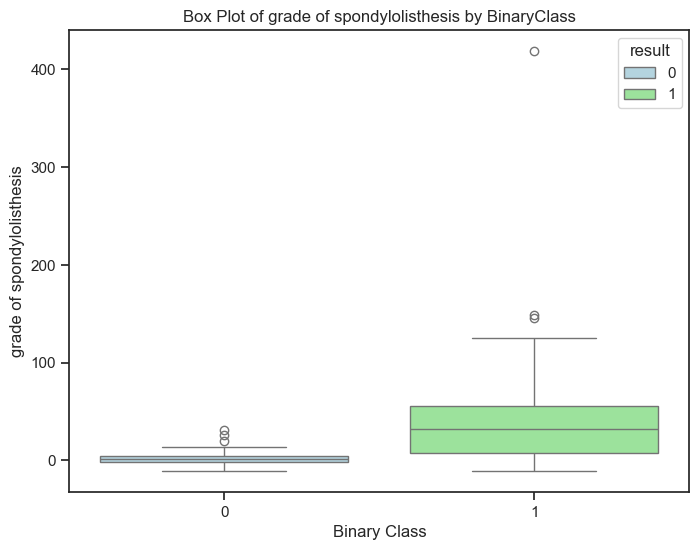

In [1466]:
##Boxplots
# relative doc:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
independent_vars = [col for col in df.columns ]
del independent_vars[-1]
print(df)

for col in independent_vars:
    data = {
    'BinaryClass': df['result'],
    'Value': col
    }
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='result', y=col, data=df,hue='result', palette=['lightblue', 'lightgreen'], legend=True)
    plt.title(f'Box Plot of {col} by BinaryClass')
    plt.xlabel('Binary Class')
    plt.ylabel(col)
    plt.show()

In [301]:
#iii.Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
#training set and the rest of the data as the test set.

In [1468]:
df

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### 1b (iii) - First 70 rows of class 0 and first 140 rows of class-1 ###

In [1470]:
filtered_df = df[df['result'] == 'NO']
#From index 210 NO starts , consider only first 70
first_70_rows_NO_class = df.iloc[210:210 + 70]
first_140_rows_AB_class = df.head(140)

In [1472]:
training_set = pd.concat([first_70_rows_NO_class, first_140_rows_AB_class], axis=0, ignore_index=True)


In [1474]:
training_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [1476]:
features=training_set.drop('result',axis=1)
features

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,38.51,16.96,35.11,21.54,127.63,7.99
1,54.92,18.97,51.60,35.95,125.85,2.00
2,44.36,8.95,46.90,35.42,129.22,4.99
3,48.32,17.45,48.00,30.87,128.98,-0.91
4,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09
206,88.02,39.84,81.77,48.18,116.60,56.77
207,83.40,34.31,78.42,49.09,110.47,49.67
208,72.05,24.70,79.87,47.35,107.17,56.43


In [1478]:
training_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


### 1c (i) : code for k-nearest neighbors with Euclidean metric  ###

In [1480]:
#From scikit-learn.org
# if p=2, and default metric is minkowski then it is using Euclidean
knn=KNeighborsClassifier(n_neighbors = 3,metric ='euclidean')
knn.fit(features,training_set['result'])

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1482]:
#Testing on trained KNN Classifier
test1=df.iloc[140:210]
test2=df.iloc[280:]


In [1484]:
test1

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


In [1486]:
test2

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
285,67.80,16.55,43.26,51.25,119.69,4.87,0
286,61.73,17.11,46.90,44.62,120.92,3.09,0
287,33.04,-0.32,19.07,33.37,120.39,9.35,0
288,74.57,15.72,58.62,58.84,105.42,0.60,0
289,44.43,14.17,32.24,30.26,131.72,-3.60,0


In [1488]:
test1.shape

(70, 7)

In [1490]:
test_set = pd.concat([test2, test1], axis=0, ignore_index=True)
test_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


### c (ii) ###

In [1492]:
#test_set['result'] = test_set['result'].map({'NO': 0, 'AB': 1})
test_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


In [1494]:
test_set_features = test_set.drop('result',axis=1)
predictions = knn.predict(test_set_features)
print("Predictions:", predictions)

Predictions: [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Evaluations**

### C(ii) Plotting train error and test error ###

In [1496]:
k_values = list(range(208, 0, -2))
train_errors = []
test_errors = []

for k in k_values:
    # Initializing and training KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(features, training_set['result'])
    
    # Predict on training and test sets
    predictions_TrainData = knn.predict(features)
    predictions_TestData = knn.predict(test_set_features)
    
    # Compute errors
    train_error = 1 - accuracy_score(training_set['result'], predictions_TrainData)
    test_error = 1 - accuracy_score(test_set['result'], predictions_TestData)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
print( train_errors,test_errors)

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.319047619047619, 0.30952380952380953, 0.29047619047619044, 0.2571428571428571, 0.24761904761904763, 0.23809523809523814, 0.2238095238095238, 0.2142857142857143, 0.2047619047619048, 0.18571428571428572, 0.18571428571428572, 0.19047619047619047, 0.1714285714285713

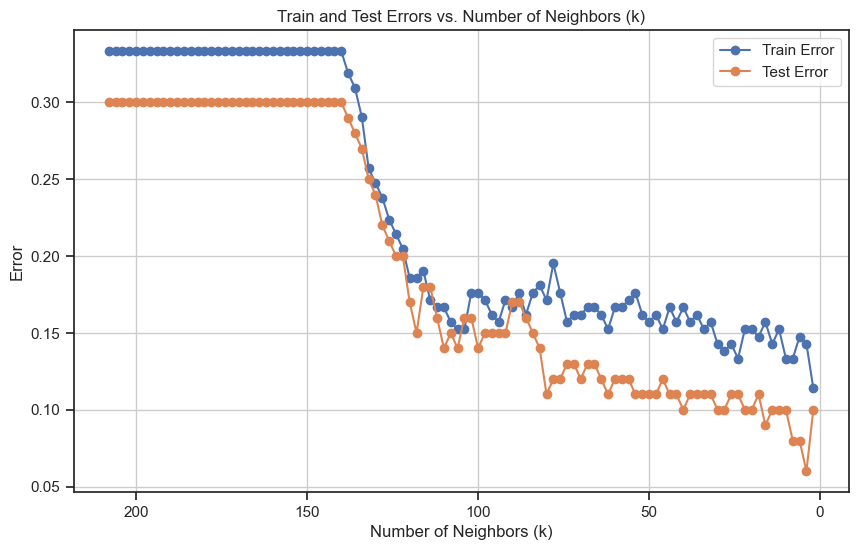

In [1498]:
# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. Number of Neighbors (k)')
plt.gca().invert_xaxis()  # To have the largest k on the left
plt.legend()
plt.grid(True)
plt.show()

### c(ii) : Finding the best optimal k which gives least test error ### 

In [1500]:
# Find the best k
mini=np.argmin(train_errors)
kmini=k_values[mini]
print("Minimum error on Training dataset is {} for k value {}".format(train_errors[mini],kmini))
optimum_k_index = np.argmin(test_errors)
optimum_k = k_values[optimum_k_index]
optimum_test_error = test_errors[optimum_k_index]
optimal_k_euclidean=optimum_k
optimal_error_euclidean=optimum_test_error
print("Best optimal k value is :{} and the minimum test error is {} for euclidean metric".format(optimum_k,optimum_test_error))
#the most suitable k can is determined mathematically by selecting the one with the lowest test error 
#as mentioned by TA Daksh Patel on Piazza : https://piazza.com/class/m09cnglrrao1gr/post/81

Minimum error on Training dataset is 0.11428571428571432 for k value 2
Best optimal k value is :4 and the minimum test error is 0.06000000000000005 for euclidean metric


### c(ii) : confusion matrix, true positive rate, true negative rate, precision, ###
### and F1 score for optimal k  : k* ###

In [1502]:
# Fit model with the optimal k
optimal_model = KNeighborsClassifier(n_neighbors=optimum_k,metric='euclidean')
optimal_model.fit(features, training_set['result'])
y_test_predictor= optimal_model.predict(test_set_features)

# Calculate confusion matrix and metrics
CONFUSION_MATRIX = confusion_matrix(test_set['result'], y_test_predictor)
TP = CONFUSION_MATRIX[1, 1]  # True Positive
TN = CONFUSION_MATRIX[0, 0]  # True Negative
FP = CONFUSION_MATRIX[0, 1]  # False Positive
FN = CONFUSION_MATRIX[1, 0]  # False Negative
precision = TP/(TP + FP)
recall=TP/(TP+FN)
f1_score = 2 * ((precision*recall)/(precision + recall ))
print("F1 score for optimal k={} is {}".format(optimum_k, f1_score))
print("True Positive Rate :",TP)
print("True Negative Rate :",TN)
print("Precision   :",precision)
print("Recall   :",recall)
print("CONFUSION_MATRIX\n",CONFUSION_MATRIX)


F1 score for optimal k=4 is 0.9583333333333333
True Positive Rate : 69
True Negative Rate : 25
Precision   : 0.9324324324324325
Recall   : 0.9857142857142858
CONFUSION_MATRIX
 [[25  5]
 [ 1 69]]


In [1504]:
training_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


### c(iii): For every N :{10,16,22,......211} , finding best k  ###
    

In [1506]:
final_test_error_list=[]

# {10,16,22,......211}
for N in range(10,211,6):
    class_0_trainingSet_size = round(N/3)
    class_1_trainingSet_size = N-class_0_trainingSet_size
    current=pd.concat([training_set.iloc[0:class_0_trainingSet_size] , training_set.iloc[70:70 + class_1_trainingSet_size]])
    y_original=current['result']
    current.drop(columns=['result'], inplace=True)
    errorList=[]
    k_values=list(range(1,N,5))
    for k in range(1,N,5):
        model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        model.fit(current,y_original)
        predictions_on_TestData = model.predict(test_set_features)
        #Calculating the  error
        test_error = 1 - accuracy_score(test_set['result'], predictions_on_TestData)
        errorList.append(test_error)
    minimum_error_for_given_N=min(errorList)
    final_test_error_list.append(minimum_error_for_given_N)
    index=np.argmin(errorList)

**for every value of N :printining optimal k for smallest error**

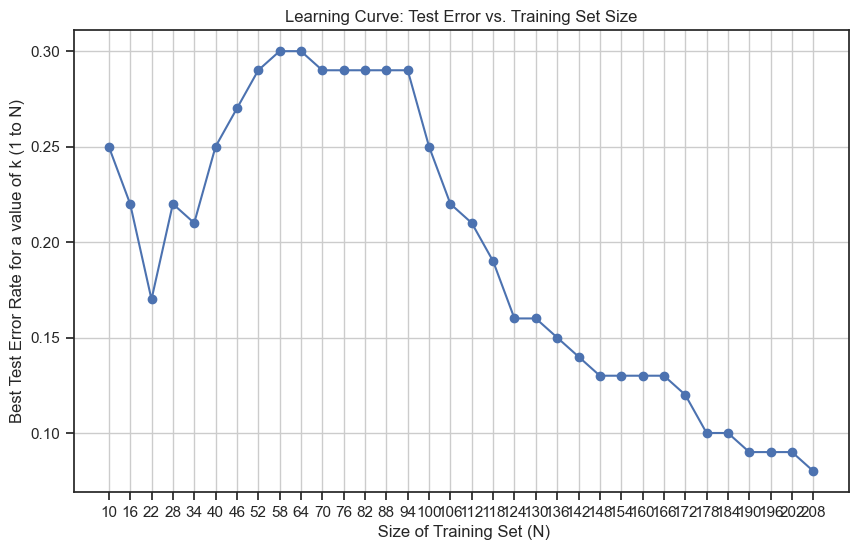

In [1507]:
# Plotting the Learning Curve
values_of_N = np.arange(10, 211, 6)
plt.figure(figsize=(10, 6))
plt.plot(values_of_N, final_test_error_list, marker='o')
plt.xlabel(' Size of Training Set (N)')
plt.ylabel('Best Test Error Rate for a value of k (1 to N)')
plt.title('Learning Curve: Test Error vs. Training Set Size')
plt.xticks(values_of_N)  # Show all training sizes on the x-axis
plt.grid()
plt.show()

### **1d (i): Minkowski Distance: p=1 ** ###

**1d(iA) Calculating Minkowski Distance for k in {1,6,11,....N-5}  ,   
When p=1, Minkowski Distance becomes Manhattan distance**

In [1440]:
test_set

,pelvic_incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,result
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


In [1512]:
N= len(training_set)
table_of_results=[]
errorList=[]
k_values=list(range(1,N-1,5))
for k in k_values:
    #create model
    model = KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=1)
    #train model
    model.fit(features, training_set['result'])
    #predict on Test data
    predictions_TestData = model.predict(test_set_features)
    #find error
    error_manhattan = 1 - accuracy_score(test_set['result'], predictions_TestData)
    errorList.append(error_manhattan)

index=np.argmin(errorList)
optimal_error_manhattan_p_1=errorList[index]
optimal_k_manhattan = k_values[index]
print("Optimal Value of k (or the value of k* is) --> {}".format(k_values[index]))
print("Optimal Value of error is --> {}".format(errorList[index]))    

Optimal Value of k (or the value of k* is) --> 6
Optimal Value of error is --> 0.10999999999999999


In [1514]:
# Find min test error at different k's
for j in range(0, len(errorList)):
    if errorList[j] == errorList[index]:
        print('k =', k_values[j], 'test error =', errorList[index])

k = 6 test error = 0.10999999999999999
k = 11 test error = 0.10999999999999999
k = 26 test error = 0.10999999999999999


**1d(i)(B)**

In [1516]:
# finding the best log_base10_(p) value from the given set => {0.1,0.2,0.3,.......,1
optimal_k = optimal_k_manhattan  #6
logBase10_p_values = list(np.arange(0.1, 1.1, 0.1))
#finding p values for the values in above list
p_values=[]
errorList=[]
for log10_p in logBase10_p_values:
    p_values.append(10**log10_p)#rounding off after 2 decimal places
for p1 in p_values:
    # Create KNN model with the current p value
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=p1)
    #train model
    model.fit(features, training_set['result'])
    #predict on Test data
    predictions_TestData = model.predict(test_set_features)
    #find error
    error_manhattan = 1 - accuracy_score(test_set['result'], predictions_TestData)
    errorList.append(error_manhattan)
index=np.argmin(errorList)
optimal_error_manhattan_log10_p=errorList[index]
optimal_k_manhattan = optimal_k
print("Minimum Value of error on test dataset is : {} for p value : {}".format(errorList[index],p_values[index]))        
print("Best log_base10_(p) value is : {}".format(logBase10_p_values[index]))
print(logBase10_p_values)
print(p_values)

Minimum Value of error on test dataset is : 0.30000000000000004 for p value : 1.2589254117941673
Best log_base10_(p) value is : 0.1
[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[1.2589254117941673, 1.5848931924611136, 1.9952623149688797, 2.51188643150958, 3.1622776601683795, 3.981071705534973, 5.011872336272724, 6.309573444801933, 7.943282347242816, 10.0]


**1d(i)(C)**

In [1518]:
logBase10_p_values

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [1522]:
#Chebyshev , finding optimal k* from all values of k
N= len(training_set)
errorList=[]
k_values=list(range(1,N-1,5))
for k in range(1,N-1,5):
    #create model
    model = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    #train model
    model.fit(features, training_set['result'])
    #predict on Test data
    predictions_TestData = model.predict(test_set_features)
    #find error
    error_manhattan = 1 - accuracy_score(test_set['result'], predictions_TestData)
    errorList.append(error_manhattan)

index=np.argmin(errorList)
optimal_error_chebyshev = errorList[index]
optimal_k_chebyshev=k_values[index]
print("Optimal Value of k (or the value of k* is) --> {}".format(k_values[index]))
print("Optimal Value of error is --> {}".format(errorList[index]))  


Optimal Value of k (or the value of k* is) --> 16
Optimal Value of error is --> 0.07999999999999996


**d(ii) Mahalanobis Distance**

In [1524]:
N= len(training_set)
errorList=[]
k_values=list(range(1,N-1,5))
# converting Data Frame containing samples into matrix of numeric values :
trainingSet_features_matrix = features.values
# calculate covariance matrix
cov_matrix=np.cov(trainingSet_features_matrix.T)
# computing the inverse of the covariance matrix
try:
    # Trying the regular inverse first
    VI = np.linalg.inv(cov_matrix)
except np.linalg.LinAlgError:
    # If the matrix is singular, use the pseudo-inverse
    print("Covariance matrix is singular, using pseudo-inverse.")
    VI = np.linalg.pinv(cov_matrix)
y_train=training_set['result'].tolist()
features_list=[]
for index, row in features.iterrows():
    features_list.append(row.tolist())
for k in range(1,N-1,5):
    #calculating distance of each test sample to all other training samples
    predictions_TestData=[]
    for index, row in test_set_features.iterrows():
         x=row.tolist()
         distances = [mahalanobis(x, x_train, VI) for x_train in features_list]
         k_indices = np.argsort(distances)[:k]
         k_nearest_labels = [y_train[j] for j in k_indices]
         predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
         predictions_TestData.append(predicted_label)
    error_mahalanobis = 1 - accuracy_score(test_set['result'], predictions_TestData)
    errorList.append(error_mahalanobis)

index=np.argmin(errorList)
optimal_error_mahalanobis=errorList[index]
optimal_k_mahalanobis=k_values[index]
print("Optimal Value of k (or the value of k* is) --> {}".format(k_values[index]))
print("Optimal Value of error is --> {}".format(errorList[index]))  


Optimal Value of k (or the value of k* is) --> 1
Optimal Value of error is --> 0.17000000000000004


In [1526]:
#Printing in one Table Format
data = {
    'Name': ['Euclidean','Minkowski(Manhattan)', 'Minkowski(p=inf)', 'Chebyshev','Mahalanobis'],
    'optimal_k': [optimal_k_euclidean,optimal_k_manhattan,optimal_k_manhattan,optimal_k_chebyshev,optimal_k_mahalanobis],
    'optimal_error': [optimal_error_euclidean,optimal_error_manhattan_p_1, optimal_error_manhattan_log10_p, optimal_error_chebyshev,optimal_error_mahalanobis]
}
table_of_results= pd.DataFrame(data)
table_of_results


,Name,optimal_k,optimal_error
0,Euclidean,4,0.06
1,Minkowski(Manhattan),6,0.11
2,Minkowski(p=inf),6,0.30
3,Chebyshev,16,0.08
4,Mahalanobis,1,0.17


### **1(e) - weighted voting
### with Euclidean, Manhattan, and Chebyshev distance** 

In [1528]:
#Plotting the Curve for  all k values Vs error
def plott(final_test_error_list):
    k_values=list(range(1,N-1,5))
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, final_test_error_list, marker='o')
    plt.xlabel(' Size of k (k)')
    plt.ylabel('Best Test Error Rate for a value of k')
    plt.title('Learning Curve: Test Error vs. k ')
    plt.xticks(values_of_N)  # Show all training sizes on the x-axis
    plt.grid()
    plt.show()


Evaluating KNN with Euclidean distance:
For Euclidean the optimal k value is 6 , which gave minimum error = 0.09999999999999998
k = 6 test error = 0.09999999999999998
Plotting Curve for k vs error graph for Euclidean : 


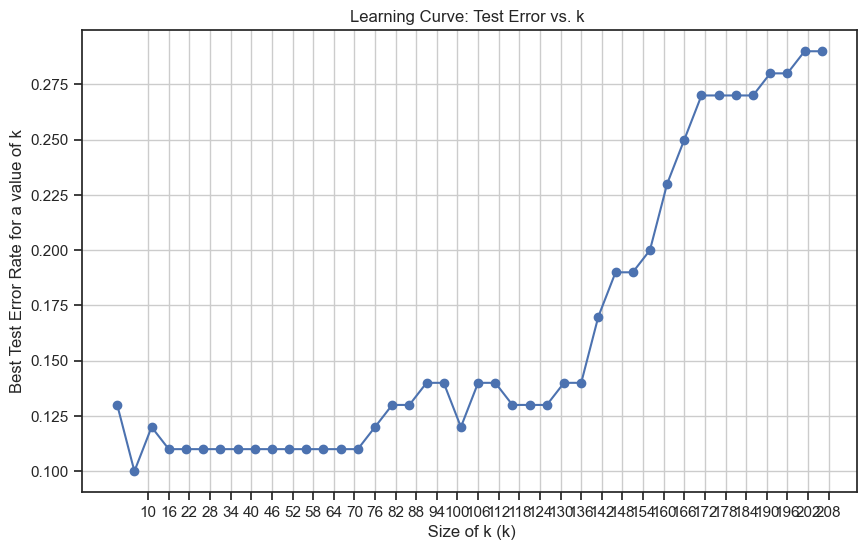


Evaluating KNN with Manhattan distance:
For Manhattan the optimal k value is 26 , which gave minimum error = 0.09999999999999998
k = 26 test error = 0.09999999999999998
Plotting Curve for k vs error graph for Manhattan : 


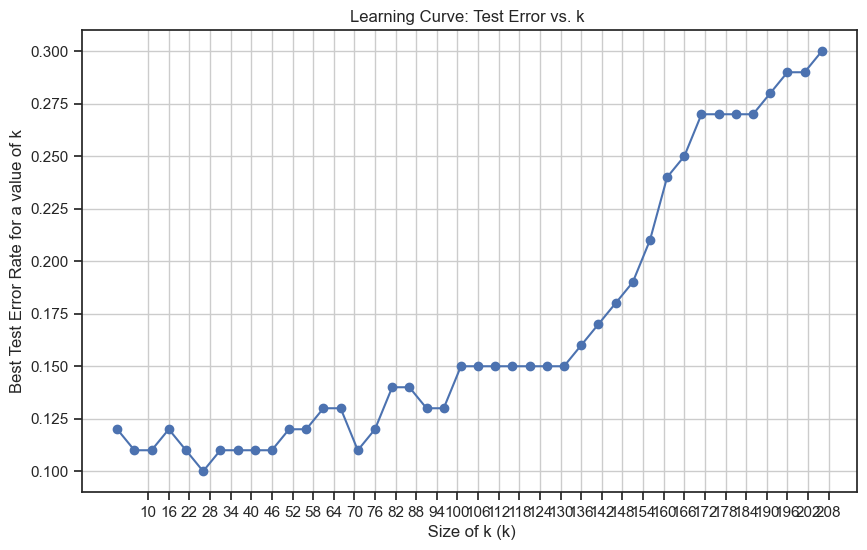


Evaluating KNN with Chebyshev distance:
For Chebyshev the optimal k value is 16 , which gave minimum error = 0.10999999999999999
k = 16 test error = 0.10999999999999999
k = 31 test error = 0.10999999999999999
k = 36 test error = 0.10999999999999999
k = 41 test error = 0.10999999999999999
k = 61 test error = 0.10999999999999999
Plotting Curve for k vs error graph for Chebyshev : 


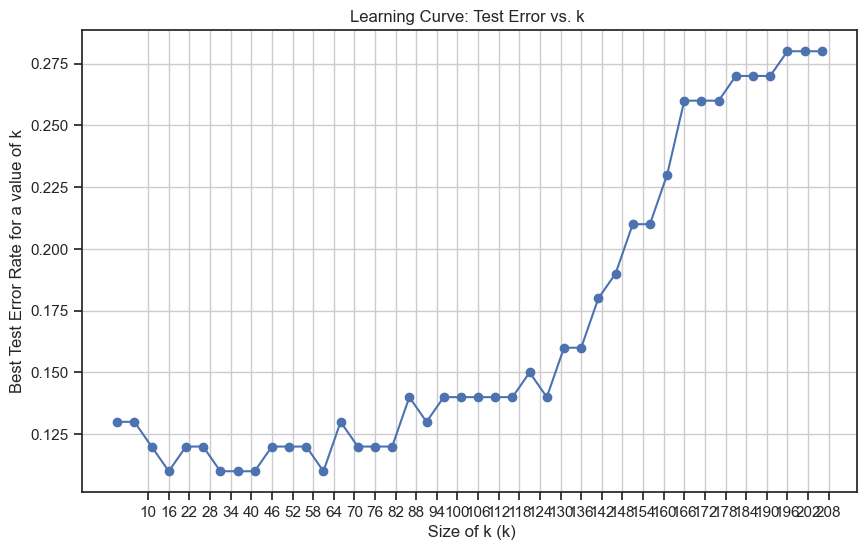

In [1530]:

k_values=list(range(1,N-1,5))
# Function to perform weighted KNN
def weighted_knn(X_train, y_train, X_test, k, distance_metric):
    predictions = []
    for test_point in X_test:
        # Calculate distances to all training points
        distances = [distance_metric(test_point, train_point) for train_point in X_train]
        
        # Get the k-nearest neighbors
        nearest_neighbors_indices = np.argsort(distances)[:k]
        nearest_distances = np.array([distances[i] for i in nearest_neighbors_indices])
        nearest_labels = np.array([y_train[i] for i in nearest_neighbors_indices])
        
        # Compute weights inversely proportional to the distance
        weights = 1 / (nearest_distances + 1e-6)  # Add small value to avoid division by zero
        
        # Summing weights for each tag
        label_weights = {}
        for i, tag in enumerate(nearest_labels):
            if tag not in label_weights:
                label_weights[tag] = 0
            label_weights[tag] += weights[i]
        
        # Predict the tag with the highest weight
        predicted_tag = max(label_weights, key=label_weights.get)
        predictions.append(predicted_tag)
    
    return predictions




# Function to evaluate KNN using different distance metrics
def find_knn(distance_metric, metric_name):
    best_error_for_each_k={}
    print(f"\nEvaluating KNN with {metric_name} distance:")
    best_k = None
    best_accuracy = 0
    errorList = []
    X_features=[]
    X_test_features=[]
    y_train=[]
    for index, row in features.iterrows():
         X_features.append(row.tolist())
    y_train=training_set['result'].tolist()
    y_test=test_set['result'].tolist()
    for index, row in test_set_features.iterrows():
         X_test_features.append(row.tolist())
        
    for k in k_values:
        predictions = weighted_knn(X_features, y_train, X_test_features, k, distance_metric)
        error = 1 - accuracy_score(y_test, predictions)
        best_error_for_each_k[k]=error
        errorList.append(error)
    index=np.argmin(errorList)
    print("For {} the optimal k value is {} , which gave minimum error = {}".format(metric_name,k_values[index],errorList[index]))
    # Find min test error at different k's for Chebyshev
    for j in range(0, len(errorList)):
        if errorList[j] == errorList[index]:
            print('k =', k_values[j], 'test error =', errorList[index])
    return errorList

# Finding with Euclidean distance
list_Of_Errors=find_knn(euclidean, "Euclidean")
print("Plotting Curve for k vs error graph for Euclidean : ")
plott(list_Of_Errors)
# Finding with Manhattan distance
list_Of_Errors=find_knn(cityblock, "Manhattan")
print("Plotting Curve for k vs error graph for Manhattan : ")
plott(list_Of_Errors)
# Finding with Chebyshev distance
list_Of_Errors=find_knn(chebyshev, "Chebyshev")
chebyshev_error_list=list_Of_Errors
print("Plotting Curve for k vs error graph for Chebyshev : ")
plott(list_Of_Errors)

### **1f : The lowest training Error**

**The lowest training error is 0 for k=1**